In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
col_names = ['host_id', 'host_since', 'neighbourhood', 'city', 'accommodates', 'price']

listing = pd.read_csv("Listings.csv", 
                    usecols = col_names,
                    encoding="ISO-8859-1", 
                    low_memory = False)

In [3]:
def analyze_city(listings_df, city_name):
    # Filter data for specified city and clean
    city_listings = listings_df.query("city == @city_name and price > 0").copy()
    
    if city_listings.empty:
        print(f"No listings found for {city_name}")
        return
    
    # Convert host_since to datetime if needed
    if not pd.api.types.is_datetime64_any_dtype(city_listings['host_since']):
        city_listings['host_since'] = pd.to_datetime(city_listings['host_since'])
    
    # 1. Neighborhood Price Analysis
    neighborhood_prices = (city_listings
                        .groupby('neighbourhood', as_index=False)['price']
                        .mean()
                        .sort_values('price'))
    
    plt.figure(figsize=(10, 6))
    sns.barplot(data=neighborhood_prices, y='neighbourhood', x='price', palette='viridis')
    plt.title(f"Average Listing Prices in {city_name} by Neighborhood", pad=20)
    plt.xlabel("Price Per Night (€)")
    plt.ylabel("")
    sns.despine()
    plt.tight_layout()
    plt.show()

    # 2. Accommodation Analysis (for most expensive neighborhood)
    if not neighborhood_prices.empty:
        expensive_neighborhood = neighborhood_prices.nlargest(1, 'price')['neighbourhood'].values[0]
        accomodation_prices = (city_listings
                            .query("neighbourhood == @expensive_neighborhood")
                            .groupby('accommodates', as_index=False)['price']
                            .mean()
                            .sort_values('price'))
        
        if not accomodation_prices.empty:
            plt.figure(figsize=(10, 6))  # Adjusted figure size for better horizontal display
            sns.barplot(data=accomodation_prices, 
                    x='price', 
                    y='accommodates',  # Swapped x and y for horizontal chart
                    palette='magma',
                    orient='h')  # Explicit horizontal orientation
            
            plt.title(f"Prices in {expensive_neighborhood} by Accommodation Capacity", pad=20)
            plt.xlabel("Price Per Night (€)")
            plt.ylabel("Accommodates")
            
            # Add value labels to each bar
            for index, value in enumerate(accomodation_prices['price']):
                plt.text(value, index, f'€{value:,.0f}', va='center', ha='left', fontsize=9)
            
            sns.despine()
            plt.tight_layout()
            plt.show()
        else:
            print(f"No accommodation data for {expensive_neighborhood}")
    else:
        print("No neighborhood price data available")

    # 3. Time Series Analysis
    time_series = (city_listings
                .set_index('host_since')
                .resample('Y')
                .agg(host_count=('host_id', 'nunique'), 
                    avg_price=('price', 'mean')))
    
    # New Hosts Over Time
    plt.figure(figsize=(10, 4))
    sns.lineplot(data=time_series, x=time_series.index, y='host_count')
    plt.title(f"New Hosts in {city_name} Over Time", pad=20)
    plt.xlabel("Year")
    plt.ylabel("Number of New Hosts")
    sns.despine()
    plt.tight_layout()
    plt.show()

    # Dual-axis Time Series
    fig, ax1 = plt.subplots(figsize=(10, 4))
    sns.lineplot(data=time_series, x=time_series.index, y='host_count', ax=ax1, color='b')
    ax1.set_ylabel("New Hosts", color='b')
    ax1.tick_params(axis='y', labelcolor='b')

    ax2 = ax1.twinx()
    sns.lineplot(data=time_series, x=time_series.index, y='avg_price', ax=ax2, color='g')
    ax2.set_ylabel("Average Price (€)", color='g')
    ax2.tick_params(axis='y', labelcolor='g')

    plt.title(f"Market Growth and Pricing in {city_name}", pad=20)
    plt.xlabel("Year")
    sns.despine()
    plt.tight_layout()
    plt.show()

C:\Users\Jimmy\AppData\Local\Temp\ipykernel_2588\2018596719.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=neighborhood_prices, y='neighbourhood', x='price', palette='viridis')


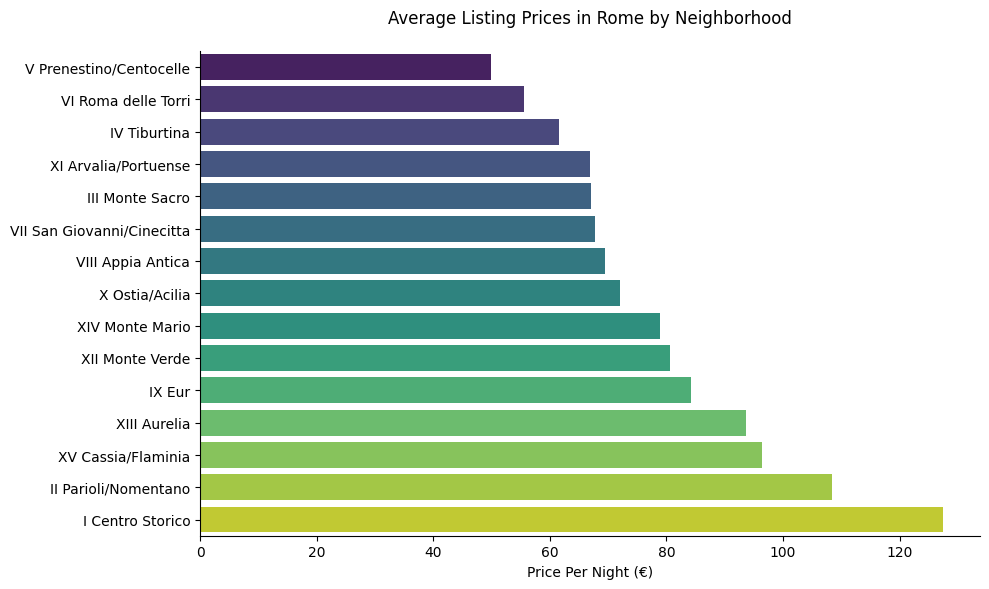

C:\Users\Jimmy\AppData\Local\Temp\ipykernel_2588\2018596719.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=accomodation_prices,


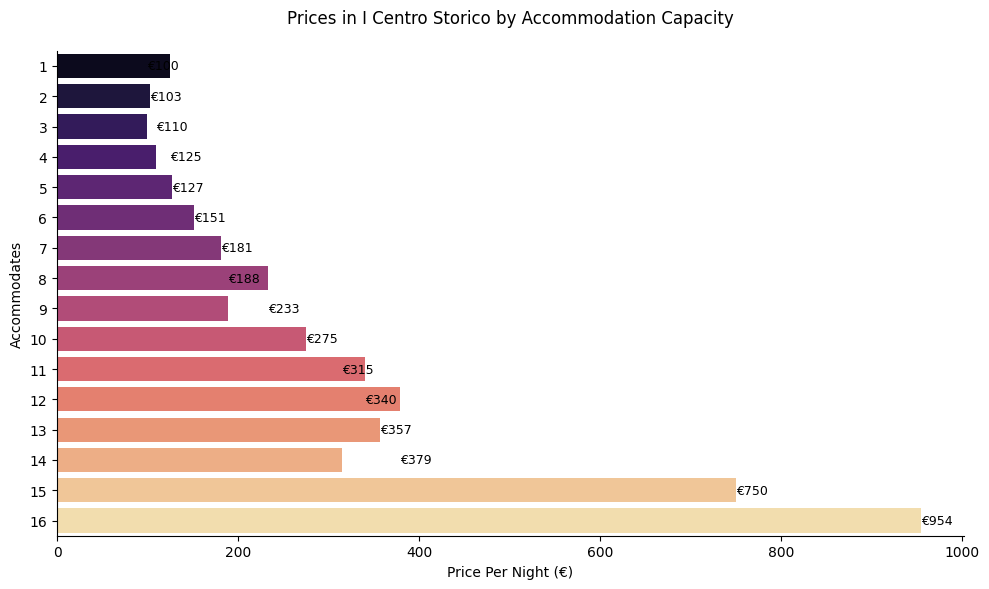

C:\Users\Jimmy\AppData\Local\Temp\ipykernel_2588\2018596719.py:64: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  .resample('Y')


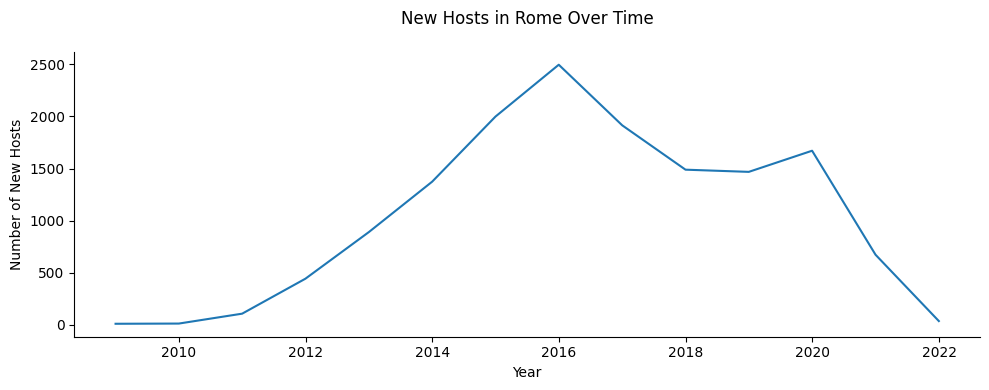

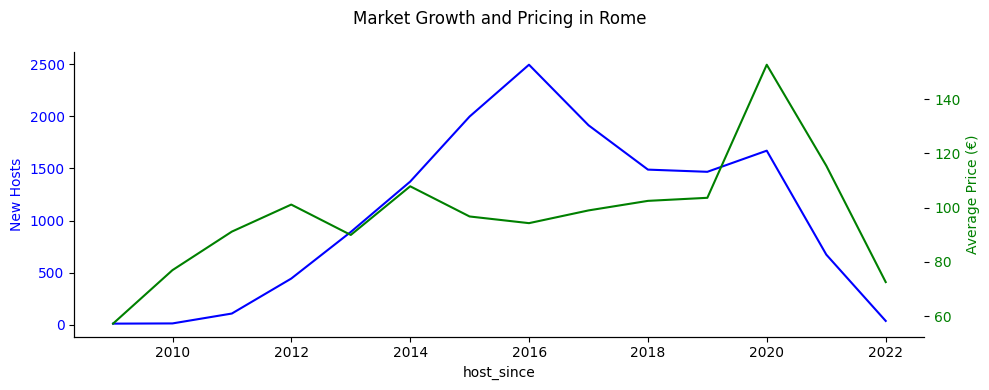

In [4]:
analyze_city(listing, 'Rome')

In [5]:
listing['city'].unique()

array(['Paris', 'New York', 'Bangkok', 'Rio de Janeiro', 'Sydney',
       'Istanbul', 'Rome', 'Hong Kong', 'Mexico City', 'Cape Town'],
      dtype=object)

In [ ]:
analyze_city(listing, '') # Enter a City